In [36]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [38]:
data = df.to_numpy()
data[:5]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94]])

In [39]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [40]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, perch_weight, test_size=0.2, random_state=42  # random_state: seed 값 (수업 중에만)
)

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)  # 학습

# 모델 파라미터 확인
print(lr.coef_, lr.intercept_)

[11.09529474 59.94662741 43.76845098] -612.9678799271909


### 가중치 계수(w<sub>1</sub>, w<sub>2</sub>, w<sub>3</sub>)와 절편(d)
y = w<sub>1</sub>a + w<sub>2</sub>b + w<sub>3</sub>c + d\
w<sub>1</sub>: `lr.coef_[0]`\
w<sub>2</sub>: `lr.coef_[1]`\
w<sub>3</sub>: `lr.coef_[2]`\
d: `lr.intercept_`

In [42]:
lr.score(test_input, test_target)

0.8931658636745737

## 2. 특성 공학
- 특성의 개수를 조합과 거듭제곱을 통해서 늘려주는 기법
- PolynomialFeatures (-> 예제는 ex03에서...)

In [43]:
# 특성공학, 특성 계수 늘리기
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape, test_poly.shape)

(44, 9) (12, 9)


In [44]:
train_poly[:5]

array([[ 28.    ,   7.82  ,   4.2   , 784.    , 218.96  , 117.6   ,
         61.1524,  32.844 ,  17.64  ],
       [ 27.3   ,   8.32  ,   5.14  , 745.29  , 227.136 , 140.322 ,
         69.2224,  42.7648,  26.4196],
       [ 19.6   ,   5.14  ,   3.04  , 384.16  , 100.744 ,  59.584 ,
         26.4196,  15.6256,   9.2416],
       [ 22.    ,   5.88  ,   3.52  , 484.    , 129.36  ,  77.44  ,
         34.5744,  20.6976,  12.3904],
       [ 18.7   ,   5.2   ,   3.12  , 349.69  ,  97.24  ,  58.344 ,
         27.04  ,  16.224 ,   9.7344]])

In [45]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [46]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print("훈련 세트 점수: ", lr.score(train_poly, train_target))
print("테스트 세트 점수: ", lr.score(test_poly, test_target))

훈련 세트 점수:  0.9900974417605037
테스트 세트 점수:  0.9766805886149259


In [47]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape, test_poly.shape)

(44, 55) (12, 55)


In [48]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print("훈련 세트 점수:", lr.score(train_poly, train_target))
print("테스트 세트 점수:", lr.score(test_poly, test_target))

훈련 세트 점수: 0.9999999999815445
테스트 세트 점수: -167.28747054534503


### 과대 적합(overfitting)이 일어남
- 너무 훈련 세트에 맞게 그래프가 꺾여 있다
- degree: 하이퍼 파라미터 (우리가 정의하는 파라미터)

#### 어떻게 해결할 수 있을까?
- 세밀하게 꺾여 있지 않도록, 그래프의 일반적인 경향성을 띠게 한다 -> **규제**

In [ ]:
# # 예측용 x도 동일한 구조로 변환
# x = np.arange(15, 50).reshape(-1, 1)
# x_poly = lr.transform(x)
# y_pred = lr.predict(x_poly)

# # 시각화
# plt.scatter(train_input, train_target, label='train')
# plt.scatter(test_input, test_target, label='test')
# plt.plot(x, y_pred, color='red', label='prediction')
# plt.xlabel('length')
# plt.ylabel('weight')
# plt.legend()
# plt.title('Polynomial Regression (degree=5)')
# plt.show()

# # 점수 출력
# print("훈련 점수:", lr.score(train_poly, train_target))
# print("테스트 점수:", lr.score(test_poly, test_target))

# import matplotlib.pyplot as plt

# x = np.arange(15, 50).reshape(-1, 1)
# x_poly = poly.transform(x)
# y_pred = lr.predict(x_poly)
# plt.plot(x, y_pred)
# plt.xlabel('length')
# plt.ylabel('weight')
# plt.xscale('log')  # log 10
# plt.show()


ValueError: X has 1 features, but PolynomialFeatures is expecting 3 features as input.

# 3. 다중 회귀 모델 훈련하기

## 규제 (정칙화)
- 모델이 너무 훈련 데이터에 맞춰지지 않도록 하는 장치 -> 모델의 **일반적인 경향성**으로 개선
- 과대적합을 완화
- 특성에 대한 **정규화**가 필수!

### 1. 릿지(Ridge)
- **_L2 규제_**
- 계수의 제곱으로 규제
- 가중치에 초정

### 2. 라쏘(Lasso)
- **_L1 규제_**
- 계수의 절댓값으로 규제
- 절편에 초점
- 사용되지 않는 특성의 계수는 0으로 만든다

In [55]:
# [규제] - 정규화가 필수

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

# 정규화
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)


In [ ]:
# 1) L2 규제 - Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(train_scaled, train_target)  # 학습

print("훈련 세트 점수:", ridge.score(train_scaled, train_target))
print("테스트 세트 점수:", ridge.score(test_scaled, test_target))

훈련 세트 점수: 0.9896004835191297
테스트 세트 점수: 0.978920058325179


In [58]:
# 2) L1 규제 - Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(train_scaled, train_target)  # 학습

print("훈련 세트 점수:", lasso.score(train_scaled, train_target))
print("테스트 세트 점수:", lasso.score(test_scaled, test_target))

훈련 세트 점수: 0.9897812228260618
테스트 세트 점수: 0.9800354016844836


In [62]:
print(lasso.coef_)

[ 0.          0.          0.         93.55374204  4.24441276  0.
  4.69789692  0.         36.20443762  0.68140064 27.55470561  0.
 27.76546065  0.          0.         17.93932403  0.          0.
 42.58642369  0.          0.          0.          0.          0.
  0.          6.53437382  0.          0.          0.         22.5348658
  0.          0.          0.          5.21830137  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         31.65962367  0.          0.          0.
  0.         24.8732492   0.          0.          0.          0.
  0.        ]


In [63]:
# 사용하지 않는 특성의 계수를 0으로
55 - np.sum(lasso.coef_ == 0)

np.int64(14)

### 규제 강도
- alpha값: 규제 강도
- 값이 작을수록(강도가 약할수록) → 계수 제한 약함 → 과대적합(overfitting) 위험 ↑
- 값이 크면(강도가 높으면) →  계수 제한 강함 → 과소적합(underfitting) 위험 ↑
- 이것도 하이퍼 파라미터! (사용자화 파라미터)
- 10의 단위 (0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000)

In [65]:
# 규제 강도 (alpha): 하이퍼 파라미터, 10의 단위로 설정 (0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000)

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)  # 학습
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

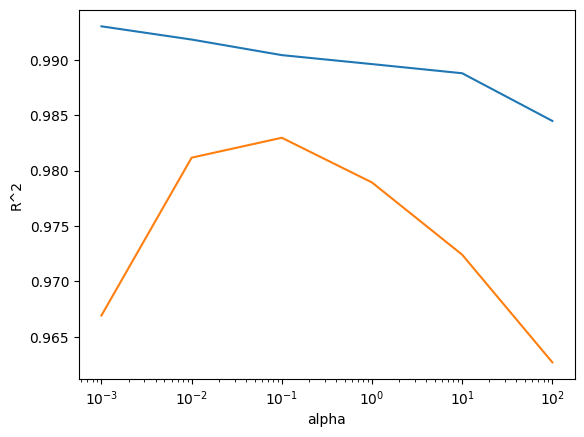

In [67]:
import matplotlib.pyplot as plt

plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.xscale('log')  # log 10
plt.show()

In [72]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print("훈련 세트 점수:", ridge.score(train_scaled, train_target))
print("테스트 세트 점수:", ridge.score(test_scaled, test_target))

훈련 세트 점수: 0.9904101980758971
테스트 세트 점수: 0.9829550564532462
